In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains
import requests, re, json ,pprint
from bs4 import BeautifulSoup
import pandas as pd
import urllib
import urllib.request
from selenium.webdriver.common.keys import Keys
from IPython.display import Image


In [2]:
driver = webdriver.Chrome('./chromedriver')
driver.implicitly_wait(10)

In [32]:
driver.get("https://www.instagram.com/internetoftim/")
# sleep(5)
# wa
# driver.close()

In [33]:
userid = 'internetoftim'

In [9]:
alt_profile_pic=userid+"'s profile picture"

In [12]:
def load_profile_page(userid,driver_path='./chromedriver'):
    options = webdriver.ChromeOptions()
    options.add_argument('headless')   
    main_driver = webdriver.Chrome(driver_path,options=options)
    main_driver.implicitly_wait(10)
    main_driver.get("https://www.instagram.com/"+userid)
    return main_driver


In [4]:
def extract_profile_pic_uri (main_driver):
    pic_url = main_driver.find_element_by_class_name(name='_6q-tv')
    return pic_url.get_attribute(name='src')
    
    

In [5]:
def download_profile_pic(userid,output_path='./'):
    main_driver = load_profile_page(userid=userid)
    profile_pic_uri = extract_profile_pic_uri(main_driver)
    urllib.request.urlretrieve(profile_pic_uri,output_path+userid+'.jpg')

In [9]:
# download_profile_pic(userid='internetoftim')
# download_profile_pic(userid='wunderingbark')

In [13]:
main_driver = load_profile_page(userid='internetoftim')

In [14]:
body_placeholder = main_driver.find_element_by_tag_name('main')

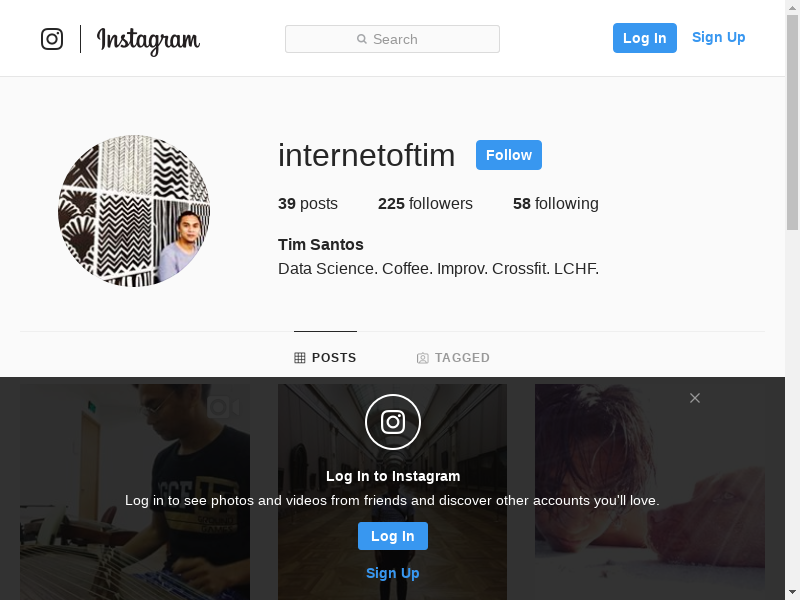

In [15]:
main_driver.get_screenshot_as_file('main-page.png')
Image(filename='main-page.png') 
# body_placeholder.send_keys(Keys.END)
# # body_placeholder.text

# # driver.switch_to.frame(driver.find_element_by_css_selector('iframe[class="credit-card-iframe mt1 u-full-width"]'))
# # driver.find_element_by_id('creditCardNumber').send_keys('0000')
# # temp_out = main_driver.switch_to.frame(main_driver.find_element_by_tag_name('main'))
# # 

# body = main_driver.find_element_by_css_selector('body')


In [16]:
body_placeholder.send_keys(Keys.PAGE_DOWN)

WebDriverException: Message: unknown error: cannot focus element
  (Session info: headless chrome=69.0.3497.100)
  (Driver info: chromedriver=2.42.591071 (0b695ff80972cc1a65a5cd643186d2ae582cd4ac),platform=Linux 4.9.0-8-amd64 x86_64)


In [29]:
# body_placeholder.is_selected()
body_placeholder.set

False

In [30]:
from selenium.webdriver.support.ui import Select


In [35]:
main_placeholder = main_driver.find_element_by_class_name('v9tJq')

In [36]:
main_placeholder.send_keys(Keys.PAGE_DOWN)

WebDriverException: Message: unknown error: cannot focus element
  (Session info: headless chrome=69.0.3497.100)
  (Driver info: chromedriver=2.41.578706 (5f725d1b4f0a4acbf5259df887244095596231db),platform=Mac OS X 10.14.0 x86_64)


In [49]:
class InstaUser:
    def __init__(self,userid):
        self.main_driver = None
        self.userid = userid
        self.profile_pic_uri = None
        self.followers = None
        self.following = None
        self.post_count = None
        self.profile_thumbnail = None
        self.screenshot = None
        self.fileout = None
    def init_driver(self):
        self.main_driver = load_profile_page(userid=self.userid)
    def extract_profile_pic(self):
        self.profile_pic_uri = extract_profile_pic_uri(self.main_driver)
    def screenshot_main(self,fileout='main-page.png'):
        main_driver.get_screenshot_as_file(fileout)
        self.fileout=fileout

    def to_csv(self, csvfile):
        print(csvfile)
        
    def to_db(self, db_host, db_password, db_table):
        print('write to db')

In [43]:
tim_user = InstaUser(userid='internetoftim')

In [44]:
tim_user.init_driver()

In [45]:
tim_user.extract_profile_pic()

In [46]:
tim_user.profile_pic_uri

'https://scontent-hkg3-1.cdninstagram.com/vp/1783592e02bd4ab825db6631e8054837/5C3F78AB/t51.2885-19/s150x150/17333968_1876464679298542_9042449064951545856_a.jpg'

In [47]:
tim_user.screenshot_main()

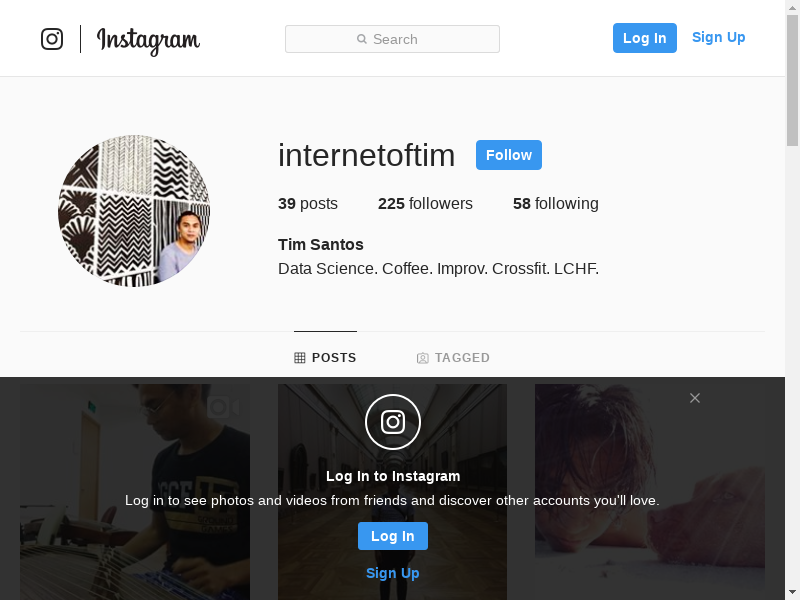

In [48]:
Image(filename=tim_user.fileout) 

In [41]:
tim_user.fileout